<a href="https://colab.research.google.com/github/Cairo-Henrique/Estrutura-e-dinamica-de-redes-complexas/blob/main/SIR_Model_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SIR Epidemic Simulation

This Python script simulates the spread of an epidemic using the SIR (Susceptible-Infected-Recovered) model on a random graph. The model tracks how individuals in a population move between states (S, I, R) over time, based on infection and recovery probabilities.

### Key Features:

* **Graph Generation**: Uses a model to create a random graph of nodes (individuals) and edges (connections).
* **Epidemic Spread**: Simulates infection spreading from infected individuals (I) to susceptible ones (S), and recovery from infected individuals (I) to recovered ones (R).
* **Visualization**: Tracks and plots the fractions of susceptible, infected, and recovered individuals over time.

### Key Functions:

* **`infect(G)`**: Initializes the epidemic by selecting a random node to be infected.
* **`update(G)`**: Updates the graph each time step, modeling infections and recoveries.
* **`SIR_epidemic(G, tmax)`**: Runs the simulation for a specified number of steps (`tmax`), returning the S, I, and R values over time.

### Parameters:

* `n`: Number of nodes (individuals).
* `m`: Expected number of edges (connections).
* `beta`: Probability of infection.
* `gamma`: Probability of recovery.
* `tmax`: Number of time steps for the simulation.

### Requirements:

* Python packages: `networkx`, `matplotlib`, `numpy`

### Usage:

Run the simulation, track the epidemic dynamics, and visualize the results with time plots of susceptible, infected, and recovered individuals.


Packages

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Functions

In [35]:
def infect(G):
  # Seleciona um nó aleatório como I e adiciona o atributo S ao resto
  nx.set_node_attributes(G, 'S', 'state')
  node = np.random.choice(G.nodes())
  G.nodes[node-1]['state'] = 'I'
  return G

def update(G):
  # a cada iteração, os vizinhos de um nó I se tornam I com probabilidade beta
  # e um I se torna R com probabilidade gamma
  H = G.copy()
  for node in G.nodes():
    if G.nodes[node]['state'] == 'I':
      for neighbor in G.neighbors(node):
        if G.nodes[neighbor]['state'] == 'S' and np.random.rand() < beta:
          H.nodes[neighbor]['state'] = 'I'
      if np.random.rand() < gamma:
        H.nodes[node]['state'] = 'R'
  return H

def SIR_epidemic(G, tmax):
  # Loop
  S = np.zeros(tmax)
  I = np.zeros(tmax)
  R = np.zeros(tmax)
  G = infect(G)
  n = len(G.nodes())
  for t in np.arange(tmax):
    S[t] = len([node for node in G.nodes() if G.nodes[node]['state'] == 'S']) / n
    I[t] = len([node for node in G.nodes() if G.nodes[node]['state'] == 'I']) / n
    R[t] = len([node for node in G.nodes() if G.nodes[node]['state'] == 'R']) / n

    if I[t] == 0:
      print('A infeccção desapareceu!')
      S[t:] = S[t] * np.ones(tmax - t)
      I[t:] = np.zeros(tmax - t)
      R[t:] = R[t] * np.ones(tmax - t)
      break

    G = update(G)
  return S, I, R

Network creation (select one)

In [36]:
# Parâmetros da rede

m = 25000 # número esperado de arestas
n = 10000 # número de vértices

In [37]:
# Grafo aleatório Erdos-Renyi

p = 2 * m / (n*(n-1)) # probabilidade de conexão de cada novo vértice
G = nx.erdos_renyi_graph(n, p) # n vértices com probabilidade de conexão p

In [38]:
# Grafo aleatório Barabási-Albert

nos_conectados = 1 # número de vértices conectados a cada novo vértice
G = nx.barabasi_albert_graph(n, nos_conectados)

In [39]:
# Grafo aleatório Watts-Strogatz (Small World)
k = 4 # grau
p = 0.1 # probabilidade de rearesta
G = nx.watts_strogatz_graph(n, k, p)

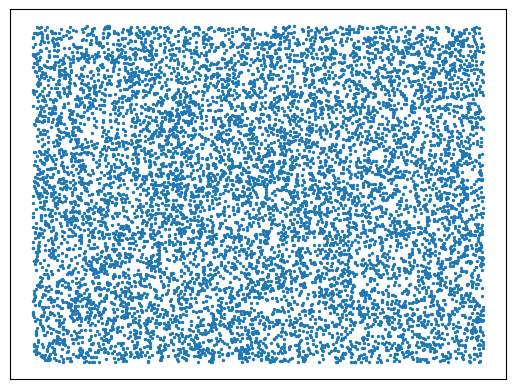

In [40]:
pos = nx.random_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=2)
plt.show()

Simulation

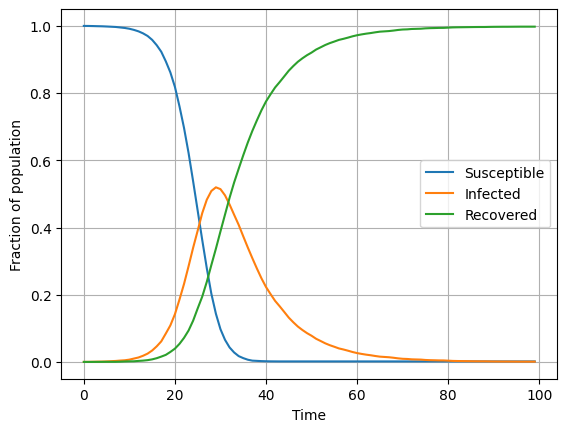

In [41]:
# Parâmetros do loop
beta = 0.4 # probabilidade de infecção
gamma = 0.1 # probabilidade de recuperação
tmax = 100 # número de iteracoes

# loop
S, I, R = SIR_epidemic(G, tmax)
array_t = np.arange(tmax)

# Gráfico
plt.figure()
plt.plot(array_t, S, label='Susceptible')
plt.plot(array_t, I, label='Infected')
plt.plot(array_t, R, label='Recovered')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Fraction of population')
plt.legend()
plt.show()

γ = 0: SI model

γ = 1: Reed-Frost SIR Model

β = 0: no epidemic (same result as the infection starting out of the giant component)

β = 1: S, I → 0 and R → 1 as t → ∞